<h1>Landcover statistics of Texas State.</h1>

Landcover data for this assignment was obtained from Texas Natural Resources Information System(TNRIS). National Land Cover Database (NLCD) assesses the landcover changes and trends across the United Satates. We used the data clipped for Texas state.

Objectives:
1. Graphical representation of various land Use distribution per planted area. # Bar chart
2. Check the land area of Texas using Land Use map.
3. Classifying land use map into 4 different types of areas by perviousness feature. #Classify and 
4. Estimating the area of impervious land.

Sources:

In [1]:
# https://automating-gis-processes.github.io/2016/Lesson7-read-raster.html#:~:text=With%20GDAL%2C%20you%20can%20read,ASCII%20Grid%20and%20Erdas%20Imagine%20.
# https://automating-gis-processes.github.io/2016/Lesson7-read-raster-array.html
# https://www.w3schools.com/python/matplotlib_pie_charts.asp
# https://www.geeksforgeeks.org/visualizing-tiff-file-using-matplotlib-and-gdal-using-python/
# https://stackoverflow.com/questions/53341842/the-easiest-way-to-print-two-numpy-arrays-as-a-table

In [2]:
#Importing gdal, os and numpy libraies
import gdal
import os
import numpy as np

In [3]:
#Import the image file using gdal.Open function
image=("C:\\Users\\aawaz\\Downloads\\TNRIS\\nlcd19_48_lc\\nlcd_2019_land_cover_l48_20210604_TX.img") # File path on drive
raster = gdal.Open(image) # the image file being saved on the variable raster

In [4]:
#Reading the image file as an array that has single band layer.
array=np.array(raster.GetRasterBand(1).ReadAsArray())

In [5]:
# importing matplotlib library to graphical plots and visualization
import matplotlib.pyplot as plt

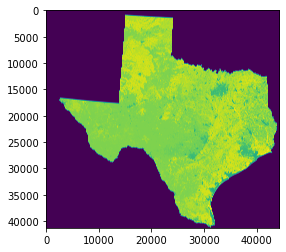

In [6]:
#showing the land use map 
plt.imshow(array)
plt.show()

In [7]:
#No of pixels in x-y direction.
size=raster.RasterXSize,raster.RasterYSize
size# checking the size of matrix or the no. of cells in x and y direction.

(44254, 41260)

In [8]:
#Printing the unique values present in the numpy array representing erdas image file. 
a=np.unique(array)
a # see what unique colors are present in the image.

array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
         52,   71,   81,   82,   90,   95], dtype=int8)

In [9]:
#Defining variables to count the number of pixels having varius color codes.
blank = len(array[array == -128])       # It is grey baground on the image.
tx = len(array[array!= -128])           # The count of all other numbers except the baground.
zero = len(array[array == 0])           # Counting the number of pixels having 0 values, naming it as zero.
water = len(array[array == 11])         # Open Water
develop = len(array[array == 21])+len(array[array == 22])+len(array[array == 23])+len(array[array == 24]) #Developed area 
barren = len(array[array == 31])                                                     # Barren Land(Rock/Clay/Sand)
forest = len(array[array == 41])+len(array[array == 42])+len(array[array == 43])     # Forest
shrub_52 = len(array[array == 52])                                                   # Shrubland
herb_71 = len(array[array == 71])                                                    # Herbaceous
cultivated = len(array[array == 81])+len(array[array == 82])                         # Planted/Cultivated
wetland = len(array[array == 90])+len(array[array == 95])                            # Wetlands

tx == (zero+water+develop+barren+forest+shrub_52+herb_71+cultivated+wetland)

In [10]:
#Conversion Factor to convert meter to mile
m2mi2= 3.861e-7

In [11]:
a_tx=tx*30*30    # area of texas
percent_bl=round(blank/(tx+blank)*100,2)   # percentage of the grey baground in the image.

In [38]:
print("In the picture the grey baground is",percent_bl,"% of total image area.")
print("The area of Texas is",round(a_tx*m2mi2,2),"sq miles.") # Answer to Question 2
print("The total area of Planted/Cultivated area in Texas is",round(cultivated*30*30*m2mi2,2),"sq miles.","It is",round((cultivated/tx*100),2),"% of the total area of Texas.")

In the picture the grey baground is 57.88 % of total image area.
The area of Texas is 267230.89 sq miles.
The total area of Planted/Cultivated area in Texas is 59177.64 sq miles. It is 22.14 % of the total area of Texas.


In [22]:
list= [zero, water, develop, barren, forest, shrub_52, herb_71, cultivated, wetland] # Creating a list of land use values
ht = np.array(list)  # converting list to numpy array
y_area = np.multiply(ht,30*30*m2mi2) # converting pixel count to area for all landuse variable
y_ofplanted = np.multiply(y,(1/cultivated)) # numpy array of ratio of land use feature area to the area of cultivated area
label = ["Zero", "Open Water", "Developed Areas", "Barren Land", "Forest", "Shrubland(52)", "Herbland(71)", "Planted Area", "Wetlands"]

In [23]:
# See the area of each type of land use paired with the area in sq miles.
print('Legend','Area(sq mile)') # print heading
for x, y in zip(label, y_area):
    print('{0}\t{1:.1f}'.format(x, y)) # print land use name and area side by side

Legend Area(sq mile)
Zero	8.8
Open Water	5411.8
Developed Areas	15847.8
Barren Land	884.3
Forest	27653.8
Shrubland(52)	109372.3
Herbland(71)	38489.5
Planted Area	59177.6
Wetlands	10385.1


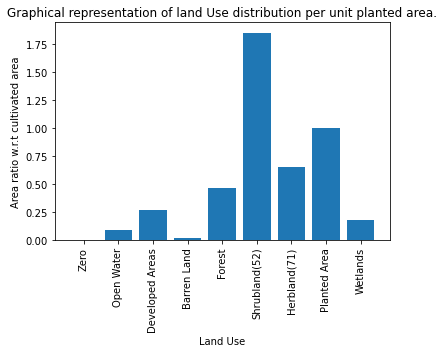

In [24]:
#Plotting bar graph of land use in ratio to planted area.
plt.bar(label, y_ofplanted)
plt.title('Graphical representation of land Use distribution per unit planted area.') # title
plt.xlabel('Land Use') # x axis name
plt.ylabel('Area ratio w.r.t cultivated area') # y axis name
pl = plt.gca() # gca function used to get the current instance axes.
pl.tick_params(axis='x', labelrotation = 90) # to rorate the names of land use by 90 degree.
plt.show()# plot

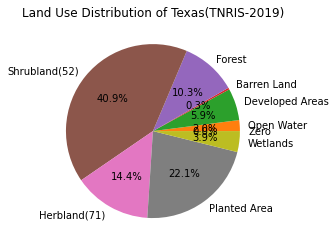

In [25]:
# Plotting pie chart to show various proportion of land use in texas.
plt.pie(ht, labels = label,autopct='%1.1f%%') # and show the percentage occupancy percentage of the land use area.
plt.title("Land Use Distribution of Texas(TNRIS-2019)")   # title
plt.show() #plot

In [67]:
#(zero, water, develop, barren, forest, shrub_52, herb_71, cultivated, wetland)

3. Classifying land use map into 4 different types of areas by perviousness feature.
Area Division by Characteristics:
Blue Zone: Water dominant area(high water table).
Green ZOne: Plants and greenery area(pervious area).
Red: Developed area city and towns.
Grey: Barren land

In [26]:
blue=water+wetland
green=forest+shrub_52+herb_71+cultivated
red=develop
grey=barren
classify= [blue, green, red, grey]
y_class = np.array(classify)

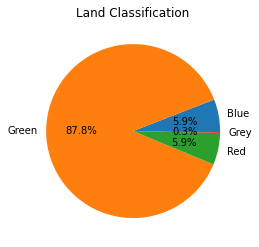

In [29]:
label_1 = ["Blue", "Green", "Red", "Grey"]
plt.pie(y_class, labels = label_1,autopct='%1.1f%%')
plt.title("Land Classification")
plt.show()

4. Estimating the area of impervious land.
Impervious featured area is present in developed areas. 
Description                            Percent of impervious area
21	Developed, Open Space:             less than 20% (used 19%)
22	Developed, Low Intensity:          20% to 49% (used 34.5%)
23	Developed, Medium Intensity:       50% to 79% (used 64.5%)
24	Developed High Intensity:          80% to 100% (used 90%)

In [46]:
#Calcilating the number of pixels that has different type of red color numners(21,22,23,24) as they are the ones representing impervious areas.
t1 = len(array[array == 21])
t2 = len(array[array == 22])
t3 = len(array[array == 23])
t4 = len(array[array == 24])
area_t = (t1*.19+t2*.345+t3*.645+t4*.9)*30*30*m2mi2
print("The total area of impervious area in Texas is",round(area_t,2),"sq miles approximately.")

The total area of impervious area in Texas is 6290.61 sq miles approximately.


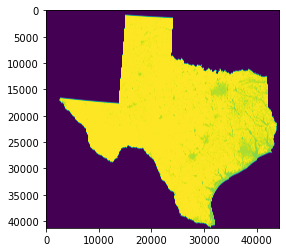

In [32]:
#5. Map of the new Classification 
# Changing 21, 22, 23 24 to red color no 21 for RED AREA
r1 = np.where(array==22, 21, array)
r2 = np.where(r1==23, 21, r1)
r3 = np.where(r2==24, 21, r2)
# Changing 11, 90, 95 to blue color no 11 for BLUE AREA

b1 = np.where(r3==90, 11, r3)
b2 = np.where(b1==95, 11, b1)
# Changing 41, 42, 43 52,71, 81,82 to green 42 for GREEN AREA
# assigning 41,43,52,71,81,82 to 42
g1 = np.where(b2==41, 42, b2)
g2 = np.where(g1==43, 42, g1)
g3 = np.where(g2==52, 42, g2)
g4 = np.where(g3==71, 42, g3)
g5 = np.where(g4==81, 42, g4)
g6 = np.where(g5==82, 42, g5)
plt.imshow(g6)
plt.show()